<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/06_01_Redes_Neuronales_Artificiales_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio **





# **Perceptrón**

### implementación del flujo de datos a travez de un perceptrón

$\hat{y} = g(w_0 + x^T w)$

con función de activación sigmoide

$g(z) = \sigma(z) = \frac{1}{1+e^{-z}}$

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
np.random.seed(50)

iris = load_iris()
X = iris.data
y = iris.target


### funciones de activación con Tensorflow

In [ ]:
import tensorflow as tf
#tf.math.sigmoid(z)
#tf.math.tanh(z)
#tf.math.relu(z)


### Ejercicio: implementar las funciones de activación tangente hiperbólico, y RELU

### Implementación usando sklearn

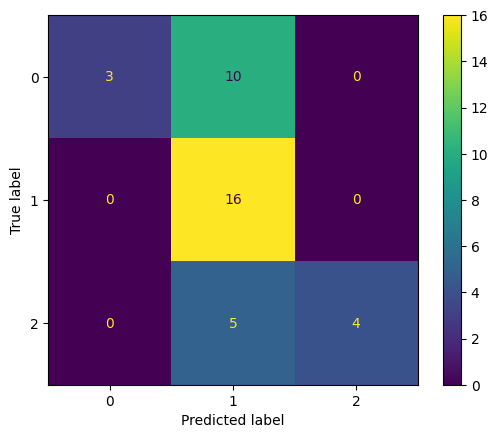

Error de validación cruzada =10,  Acc 0.7772727272727273 0.1459665861106223
Error de predicción en el conjunto de test 0.6052631578947368


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


iris = load_iris()
X = iris.data
y = iris.target
#(iris.target == 0).astype(np.int)  # Iris setosa?


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

clf = Perceptron()
# equivalente = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).
clf.fit(X, y)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

# validación de modelo
scores_cv = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print("Error de validación cruzada =10,  Acc", scores_cv.mean(), scores_cv.std())

# prediction error on test set
print("Error de predicción en el conjunto de test", accuracy_score(y_test, y_pred))


### El perceptrón con tensorflow

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#Conjunto de datos
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# paso 1: crear la arquitectura usando la API sequential
model = keras.Sequential([layers.Dense(units=1, input_shape=[4])])

# paso 2: compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#paso 3: entrenando la red
model.fit(X_train, y_train, epochs=225, batch_size=32, verbose=1, validation_split=0.2)

In [ ]:
#paso 4: evaluar el modelo
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 1.6052 - accuracy: 0.4211


[1.6051830053329468, 0.42105263471603394]

# **El perceptrón Multicapa (MLP)**

### **Implementación de clasificación supervisada con TensorFlow**

---



In [ ]:
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.13.0


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train_full.shape)
print(X_train_full.dtype)
print(X_test.shape)

(60000, 28, 28)
uint8
(10000, 28, 28)


1


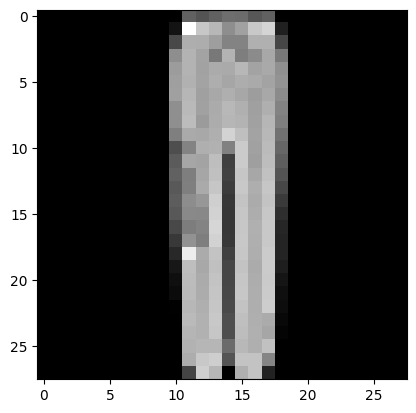

In [ ]:
import matplotlib.pyplot as plt

idx = 1000
print(y_train_full[idx])
plt.imshow(X_train_full[idx],cmap='gray') # add cmap='gray' for grayscale image

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# maneras de codificar:
# codificación one-hot encoder"
#   T-shirt/top -> [1,0,0,0,0,0,0,0,0,0]
#   Trouser -> [0,1,0,0,0,0,0,0,0,0]
#   ....
#   Ankle boot -> [0,0,0,0,0,0,0,0,0,1]


#class_names = ['Polo/Top', 'Pantalon', 'Suéter', 'Vestido','Casaca', 'Sandálias','Camisas', 'Zapatilla', 'Bolsa', 'Botas']

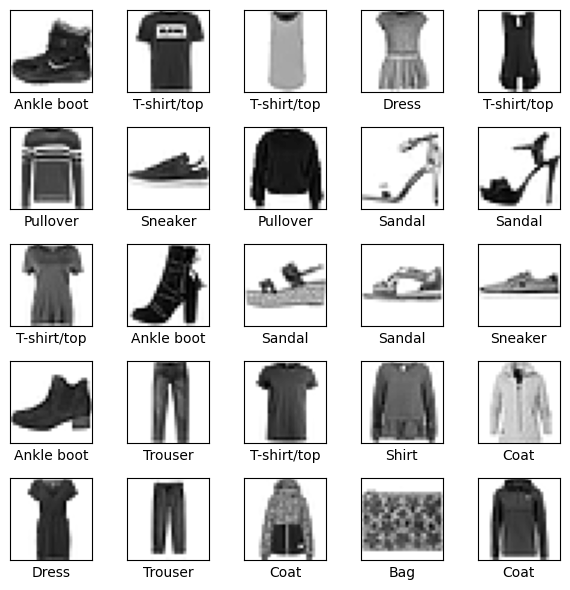

In [ ]:
plt.figure(figsize=(6,6))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.tight_layout()

# Dividir los datos en entrenamiento/validacion, y realizar el escalamiento o estandarizacion de los datos

In [ ]:
# para entrenar una red neuronal, siempre escalar/estandarizar las entradas
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.0
# alternativamente podriamos usar el MaxMinScaler del Sklearn para escalamiento
# p StandardScaler para estandarizar

### construcción del modelo con la API sequential del Keras

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28])) # capa de entrada
model.add(keras.layers.Dense(300, activation="relu")) # primera capa oculta
model.add(keras.layers.Dense(100, activation="relu")) # segunda capa oculta
model.add(keras.layers.Dense(10, activation="softmax")) # capa de salida

alternativamente:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 235500 = 784*300 + 300
# 30100  = 300*100 + 100
# 1010   = 100*10 + 10

# parametros de la red: pesos (w) y bias (w_0)
# hiperparametros: # de neuronas, # de capas, funciones de activacion, # algoritmo de optimizacion, #learning rate

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# opcional
model.layers

In [ ]:
# opcional
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.023713  ,  0.01772482, -0.0798324 , ...,  0.03531925,
        -0.04475737,  0.04981199],
       [-0.04301819,  0.00605654,  0.04986339, ...,  0.04219566,
        -0.05928753, -0.00518456],
       [ 0.03130274,  0.05029012,  0.01638827, ..., -0.03402678,
        -0.05311136,  0.09867454],
       ...,
       [ 0.0148634 , -0.00736075, -0.02513357, ...,  0.06550874,
        -0.00714925,  0.02740023],
       [-0.03905753,  0.03581209,  0.01642968, ..., -0.01718093,
         0.06807566,  0.02596275],
       [ 0.07660411, -0.05282706,  0.00858237, ..., -0.09737465,
        -0.01987456, -0.02708251]], dtype=float32)

In [ ]:
#opcional
weights.shape

(784, 300)

In [ ]:
#opcional
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# sparse_categorical_crossentropy vs categorical_crossentropy son la misma loss, pero en 'sparse_categorical_crossentropy' la codificación del target son enteros como en este ejemplo, i.e., clase[0-9].
# Usar categorical_crossentropy si la codificación del target es 'one-hot'

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
# alternativamente, especificar de manera explicita el tamaño del batch, y el validation_split
#       model.fit(X_train, y_train, epochs=225, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2226 - accuracy: 0.9201 - val_loss: 0.2955 - val_accuracy: 0.8950
Epoch 2/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2199 - accuracy: 0.9214 - val_loss: 0.3098 - val_accuracy: 0.8898
Epoch 3/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2164 - accuracy: 0.9227 - val_loss: 0.2937 - val_accuracy: 0.8964
Epoch 4/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2116 - accuracy: 0.9240 - val_loss: 0.3138 - val_accuracy: 0.8878
Epoch 5/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2093 - accuracy: 0.9253 - val_loss: 0.3007 - val_accuracy: 0.8922
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2057 - accuracy: 0.9263 - val_loss: 0.3056 - val_accuracy: 0.8934
Epoch 7/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2024 - accuracy: 0.9275 - val_loss: 0.2836 - val

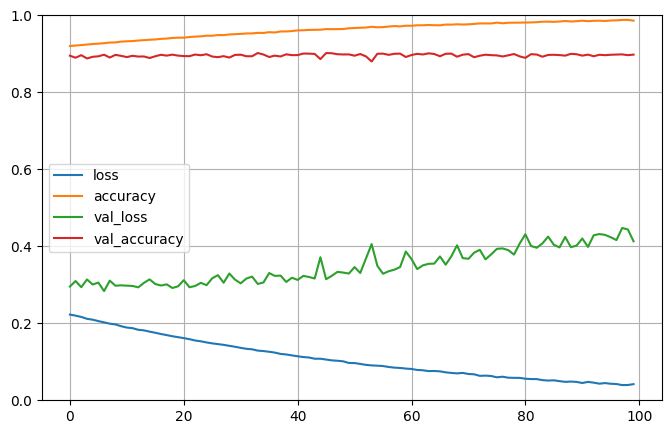

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8800


[0.33426985144615173, 0.8799999952316284]

### predicciones


In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

#class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
#               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


1/1 [==============================] - 0s 100ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred=np.argmax(model.predict(X_new) ,axis=1)
print(y_pred)
print(y_test[0:3])


1/1 [==============================] - 0s 53ms/step
[9 2 1]
[9 2 1]


### **Implementación de regresión  con TensorFlow**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

# división entrenamiento/validacion/test
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# escalamiento o estadarización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#
X_train.shape

(11610, 8)

In [ ]:
# arquitectura
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 30)                270       
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# compile
model.compile(loss="mean_squared_error", optimizer="sgd")


In [ ]:
# entrenamiento
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))


Epoch 1/50
363/363 [==============================] - 2s 6ms/step - loss: 0.3554 - val_loss: 1.8790
Epoch 2/50
363/363 [==============================] - 2s 7ms/step - loss: 0.3534 - val_loss: 5.5338
Epoch 3/50
363/363 [==============================] - 3s 9ms/step - loss: 0.3794 - val_loss: 3.2660
Epoch 4/50
363/363 [==============================] - 2s 6ms/step - loss: 0.3714 - val_loss: 0.3557
Epoch 5/50
363/363 [==============================] - 2s 6ms/step - loss: 0.3438 - val_loss: 0.3538
Epoch 6/50
363/363 [==============================] - 1s 3ms/step - loss: 0.3421 - val_loss: 0.3539
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3392 - val_loss: 0.3468
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3373 - val_loss: 0.3453
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3379 - val_loss: 0.3506
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3350 - val_loss: 0.3584

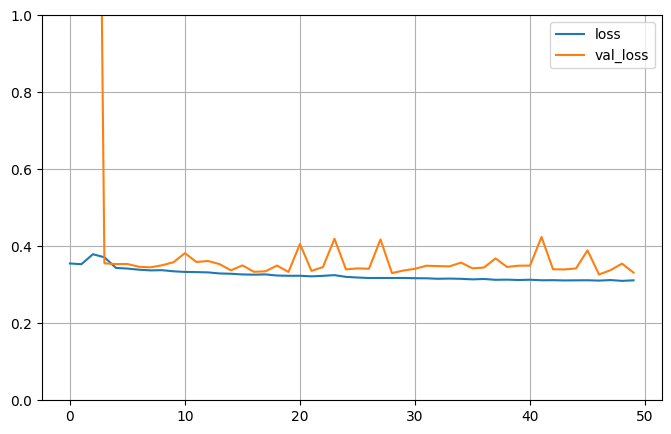

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
# evaluar en el conjunto de test
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3034


0.30344146490097046

In [ ]:
# realizar algunas predicciones
X_new = X_test[:3]
y_pred = model.predict(X_new)
print("predicciones",y_pred)
print("labels",y_test[:3])

1/1 [==============================] - 0s 82ms/step
predicciones [[1.8466126]
 [1.1110123]
 [2.4805312]]
labels [1.836 0.998 1.813]


In [ ]:
model.save("my_keras_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = keras.models.load_model("my_keras_model.h5")

### **regularización con early stopping**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

#------callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#---------------

history = model.fit(X_train, y_train, epochs=250,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/250
363/363 [==============================] - 3s 5ms/step - loss: 0.7484 - val_loss: 2.2448
Epoch 2/250
363/363 [==============================] - 2s 6ms/step - loss: 0.4550 - val_loss: 3.1611
Epoch 3/250
363/363 [==============================] - 2s 5ms/step - loss: 0.4413 - val_loss: 1.5044
Epoch 4/250
363/363 [==============================] - 1s 3ms/step - loss: 0.3924 - val_loss: 0.5521
Epoch 5/250
363/363 [==============================] - 1s 4ms/step - loss: 0.3699 - val_loss: 0.3953
Epoch 6/250
363/363 [==============================] - 1s 3ms/step - loss: 0.3580 - val_loss: 0.4010
Epoch 7/250
363/363 [==============================] - 1s 2ms/step - loss: 0.3502 - val_loss: 0.4262
Epoch 8/250
363/363 [==============================] - 1s 3ms/step - loss: 0.3443 - val_loss: 0.3534
Epoch 9/250
363/363 [==============================] - 1s 3ms/step - loss: 0.3362 - val_loss: 0.4393
Epoch 10/250
363/363 [==============================] - 1s 3ms/step - loss: 0.3332 - val_lo

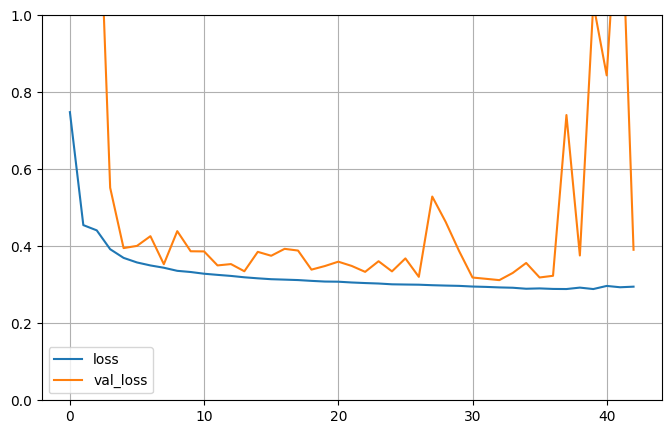

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
#model = keras.models.load_model("my_keras_model.h5") # roll back to best model
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.2900


0.28996384143829346

In [ ]:
# realizar algunas predicciones
X_new = X_test[:3]
y_pred = model.predict(X_new)
print("predicciones",y_pred)
print("labels",y_test[:3])

1/1 [==============================] - 0s 103ms/step
predicciones [[1.8569703]
 [1.2867239]
 [2.1194823]]
labels [1.836 0.998 1.813]


In [ ]:
model.save("my_keras_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Selección de modelo con Sklearn & Tensorflow**



In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
# TODO
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

AttributeError: ignored

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 2ms/step - loss: 1.0834 - val_loss: 0.7352
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6617 - val_loss: 0.6113
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5664 - val_loss: 0.5652
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5301 - val_loss: 0.5374
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5073 - val_loss: 0.5167
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4907 - val_loss: 0.5039
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4806 - val_loss: 0.4973
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4710 - val_loss: 0.4861
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4631 - val_loss: 0.4813
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4585 - val_loss: 0.4754
E

In [ ]:
#model selection
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# tarea calcular el tiempo

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 3.5327 - val_loss: 2.3777
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7453 - val_loss: 1.3760
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1972 - val_loss: 1.1369
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0268 - val_loss: 1.0053
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9149 - val_loss: 0.9043
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8317 - val_loss: 0.8285
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7720 - val_loss: 0.7745
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7306 - val_loss: 0.7374
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7028 - val_loss: 0.7120
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6840 - val_loss: 0.6944
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 4.7915 - val_loss: 4.0511
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 3.5105 - val_loss: 3.0596
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 2.7191 - val_loss: 2.4323
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 2.2178 - val_loss: 2.0338
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 1.8990 - val_loss: 1.7788
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 1.6958 - val_loss: 1.6166
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 1.5669 - val_loss: 1.5132
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4848 - val_loss: 1.4470
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 1.4326 - val_loss: 1.4048
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 1.3993 - val_loss: 1.3778
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 4.1744 - val_loss: 3.1130
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 2.4784 - val_loss: 1.9704
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.7639 - val_loss: 1.6270
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1.5339 - val_loss: 1.4744
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 1.4053 - val_loss: 1.3676
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3119 - val_loss: 1.2885
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2411 - val_loss: 1.2259
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1856 - val_loss: 1.1781
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1412 - val_loss: 1.1395
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1050 - val_loss: 1.1085
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.3875 - val_loss: 0.7710
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6857 - val_loss: 0.6850
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6267 - val_loss: 0.6303
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5848 - val_loss: 0.5912
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5553 - val_loss: 0.5614
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5323 - val_loss: 0.5362
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5159 - val_loss: 0.5206
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5021 - val_loss: 0.5075
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4915 - val_loss: 0.4966
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4822 - val_loss: 0.4921
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.9932 - val_loss: 0.7802
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8161 - val_loss: 0.6689
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6237 - val_loss: 0.6212
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5836 - val_loss: 0.5852
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5531 - val_loss: 0.5590
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5293 - val_loss: 0.5400
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5115 - val_loss: 0.5210
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4981 - val_loss: 0.5143
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4855 - val_loss: 0.4991
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4793 - val_loss: 0.4966
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 1.4097 - val_loss: 0.8295
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7904 - val_loss: 0.7016
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6522 - val_loss: 0.6323
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5940 - val_loss: 0.5945
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5588 - val_loss: 0.5661
Epoch 6/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5338 - val_loss: 0.5456
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5139 - val_loss: 0.5288
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5004 - val_loss: 0.5184
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4883 - val_loss: 0.5071
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4800 - val_loss: 0.5008
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.0598 - val_loss: 0.6931
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5816 - val_loss: 0.5704
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5174 - val_loss: 0.5175
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4908 - val_loss: 0.4923
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4651 - val_loss: 0.4784
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4508 - val_loss: 0.4650
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4384 - val_loss: 0.4632
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4300 - val_loss: 0.4554
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4205 - val_loss: 0.4501
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4134 - val_loss: 0.4508
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 1.3509 - val_loss: 0.6752
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6036 - val_loss: 0.5662
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5176 - val_loss: 0.5094
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4786 - val_loss: 0.4859
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4497 - val_loss: 0.4632
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4315 - val_loss: 0.4495
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4179 - val_loss: 0.4371
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4091 - val_loss: 0.4361
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4012 - val_loss: 0.4250
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3946 - val_loss: 0.4168
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 2s 3ms/step - loss: 1.2336 - val_loss: 0.6019
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5523 - val_loss: 0.5366
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4916 - val_loss: 0.4928
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4603 - val_loss: 0.4683
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4397 - val_loss: 0.4471
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4118 - val_loss: 0.4397
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4003 - val_loss: 0.4288
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3879 - val_loss: 0.4152
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3763 - val_loss: 0.4110
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3680 - val_loss: 0.4073
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.1545 - val_loss: 0.9768
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8110 - val_loss: 0.8355
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7351 - val_loss: 0.7736
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6928 - val_loss: 0.7264
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6595 - val_loss: 0.6890
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6336 - val_loss: 0.6645
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6122 - val_loss: 0.6292
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5949 - val_loss: 0.6199
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5796 - val_loss: 0.5933
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5663 - val_loss: 0.5833
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.9453 - val_loss: 0.8922
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7914 - val_loss: 0.7452
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7064 - val_loss: 0.6998
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6662 - val_loss: 0.6635
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6317 - val_loss: 0.6339
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6052 - val_loss: 0.6110
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5839 - val_loss: 0.5897
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5634 - val_loss: 0.5732
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5480 - val_loss: 0.5584
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5338 - val_loss: 0.5468
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.2486 - val_loss: 0.8941
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7522 - val_loss: 0.6730
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6520 - val_loss: 0.6349
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6148 - val_loss: 0.6072
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5890 - val_loss: 0.5870
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5661 - val_loss: 0.5687
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5487 - val_loss: 0.5537
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5326 - val_loss: 0.5424
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5204 - val_loss: 0.5324
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5121 - val_loss: 0.5252
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 2.7982 - val_loss: 1.0370
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7215 - val_loss: 0.6114
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5710 - val_loss: 0.5689
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5559 - val_loss: 0.5638
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5503 - val_loss: 0.5555
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5476 - val_loss: 0.5549
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5439 - val_loss: 0.5646
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5412 - val_loss: 0.5494
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5405 - val_loss: 0.5487
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5381 - val_loss: 0.5651
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 3.5176 - val_loss: 1.3561
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0197 - val_loss: 0.8249
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7661 - val_loss: 0.7583
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7118 - val_loss: 0.7170
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6796 - val_loss: 0.6926
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6553 - val_loss: 0.6696
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6351 - val_loss: 0.6473
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6182 - val_loss: 0.6306
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6057 - val_loss: 0.6217
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5919 - val_loss: 0.6024
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 2.7878 - val_loss: 1.0600
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7955 - val_loss: 0.6842
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6348 - val_loss: 0.6405
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6060 - val_loss: 0.6207
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5900 - val_loss: 0.6066
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5774 - val_loss: 0.5949
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5675 - val_loss: 0.5851
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5585 - val_loss: 0.5773
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5514 - val_loss: 0.5688
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5452 - val_loss: 0.5633
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 1.7167 - val_loss: 0.9121
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6452 - val_loss: 0.8037
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6015 - val_loss: 0.7324
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5784 - val_loss: 0.6871
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5675 - val_loss: 0.6481
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5594 - val_loss: 0.6155
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5494 - val_loss: 0.5836
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5578 - val_loss: 0.5717
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5496 - val_loss: 0.5685
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5460 - val_loss: 0.5558
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 1.7221 - val_loss: 0.9129
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6966 - val_loss: 0.6843
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6318 - val_loss: 0.6520
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9868 - val_loss: 0.6091
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8623 - val_loss: 0.5854
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5634 - val_loss: 0.5764
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5576 - val_loss: 0.5469
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5623 - val_loss: 0.5393
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5428 - val_loss: 0.5450
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5346 - val_loss: 0.5380
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 1.7319 - val_loss: 0.7511
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6851 - val_loss: 0.6657
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6157 - val_loss: 0.6155
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5803 - val_loss: 0.5840
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5517 - val_loss: 0.5794
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5453 - val_loss: 0.5546
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5331 - val_loss: 0.5537
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5302 - val_loss: 0.5390
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5249 - val_loss: 0.5503
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5239 - val_loss: 0.5343
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.1154 - val_loss: 0.8376
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6769 - val_loss: 0.7194
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6128 - val_loss: 0.6510
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5716 - val_loss: 0.6047
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5403 - val_loss: 0.5659
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5152 - val_loss: 0.5369
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4964 - val_loss: 0.5190
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4833 - val_loss: 0.5096
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4786 - val_loss: 0.4992
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4879
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.1696 - val_loss: 0.7238
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6572 - val_loss: 0.5979
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5503 - val_loss: 0.5431
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5156 - val_loss: 0.5187
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5044 - val_loss: 0.5258
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4955 - val_loss: 0.4974
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4817 - val_loss: 0.4965
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4725 - val_loss: 0.4785
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4776 - val_loss: 0.4827
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4607 - val_loss: 0.4697
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.4637 - val_loss: 0.5868
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5407 - val_loss: 0.5328
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.5172
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4841 - val_loss: 0.4999
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4756 - val_loss: 0.4839
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4675 - val_loss: 0.4797
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4596 - val_loss: 0.4721
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4540 - val_loss: 0.4679
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4487 - val_loss: 0.4646
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4433 - val_loss: 0.4604
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 2.0001 - val_loss: 0.8308
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6473 - val_loss: 0.7596
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6007 - val_loss: 0.7523
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5757 - val_loss: 0.7623
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5575 - val_loss: 0.7517
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5475 - val_loss: 0.7631
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5411 - val_loss: 0.7850
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5335 - val_loss: 0.7850
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5323 - val_loss: 0.8057
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5286 - val_loss: 0.8194
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 2.5900 - val_loss: 0.8354
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9008 - val_loss: 0.7355
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8353 - val_loss: 0.6569
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7469 - val_loss: 0.6368
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6720 - val_loss: 0.5897
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5837 - val_loss: 0.5811
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5629 - val_loss: 0.5745
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5676 - val_loss: 0.5651
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5649 - val_loss: 0.5771
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5410 - val_loss: 0.5490
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 1.7742 - val_loss: 0.6350
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5817 - val_loss: 0.5714
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5954 - val_loss: 0.5548
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5741 - val_loss: 0.5635
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5876 - val_loss: 0.5463
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5340 - val_loss: 0.5460
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5280 - val_loss: 0.5539
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5778 - val_loss: 0.5535
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5283 - val_loss: 0.5468
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5290 - val_loss: 0.5421
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.0463 - val_loss: 0.8600
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7119 - val_loss: 0.6866
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6423 - val_loss: 0.6398
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6077 - val_loss: 0.6084
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5822 - val_loss: 0.5822
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5612 - val_loss: 0.5659
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5434 - val_loss: 0.5462
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5269 - val_loss: 0.5345
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5129 - val_loss: 0.5211
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4996 - val_loss: 0.5092
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.7871 - val_loss: 0.7569
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7123 - val_loss: 0.6915
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6502 - val_loss: 0.6499
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6108 - val_loss: 0.6138
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5784 - val_loss: 0.5864
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5513 - val_loss: 0.5620
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5291 - val_loss: 0.5449
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5111 - val_loss: 0.5304
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4950 - val_loss: 0.5142
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4830 - val_loss: 0.5021
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.0530 - val_loss: 0.8096
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7096 - val_loss: 0.6641
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6265 - val_loss: 0.6213
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5824 - val_loss: 0.5851
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5467 - val_loss: 0.5537
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5180 - val_loss: 0.5272
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4952 - val_loss: 0.5099
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4779 - val_loss: 0.4941
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4633 - val_loss: 0.4806
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4532 - val_loss: 0.4720
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.7531 - val_loss: 0.8349
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7085 - val_loss: 0.7270
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6478 - val_loss: 0.6755
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6127 - val_loss: 0.6377
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5856 - val_loss: 0.6085
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5645 - val_loss: 0.5846
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5474 - val_loss: 0.5664
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5327 - val_loss: 0.5498
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5201 - val_loss: 0.5399
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5102 - val_loss: 0.5269
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.9628 - val_loss: 0.8370
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7412 - val_loss: 0.6877
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6417 - val_loss: 0.6361
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5991 - val_loss: 0.6040
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5666 - val_loss: 0.5744
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5427 - val_loss: 0.5530
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5217 - val_loss: 0.5358
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5051 - val_loss: 0.5196
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4914 - val_loss: 0.5070
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4799 - val_loss: 0.4964
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.9384 - val_loss: 0.9113
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7455 - val_loss: 0.6769
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6307 - val_loss: 0.6288
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5913 - val_loss: 0.5987
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5648 - val_loss: 0.5755
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5438 - val_loss: 0.5570
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5268 - val_loss: 0.5407
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5115 - val_loss: 0.5275
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4986 - val_loss: 0.5152
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4877 - val_loss: 0.5038
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc8a9b93b50>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc8aa835710>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.004142809095903494, 'n_hidden': 3, 'n_neurons': 70}

In [ ]:
rnd_search_cv.best_score_

-0.3273305396238963

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)